# Matrix Factorization and Recommender System

## Definitions:

### Matrix Factorization

#### Matrix Factorization

Matrix factorization is a technique used to decompose a large matrix into the product of two or more smaller matrices. It is widely used in recommendation systems, dimensionality reduction, and data compression. The goal is to find two matrices $W$ and $H$ such that their product approximates the original matrix $A$.

#### Formal Definition

Given a matrix $A$ of dimensions $m \times n$, matrix factorization aims to find:

$A \approx W H^T$

where:
- $W$ is an $m \times k$ matrix, representing the latent features of rows (e.g., users).
- $H$ is an $n \times k$ matrix, representing the latent features of columns (e.g., items).
- $k$ is the number of latent features, typically much smaller than $m$ or $n$.

#### Objective Function

The objective function typically minimized in matrix factorization is:

$\min_{W, H} \frac{1}{2} \sum_{i,j \in \Omega} (A_{ij} - (WH^T)_{ij})^2 + \frac{\lambda}{2} (\|W\|_F^2 + \|H\|_F^2)$

where:
- $\Omega$ represents the set of observed entries in $A$.
- $\frac{\lambda}{2} (\|W\|_F^2 + \|H\|_F^2)$ are regularization terms to prevent overfitting.

### Recommender Systems:

- You have the yellow cells as inputs from Users.
- The red question mark is what you'd need to predict.

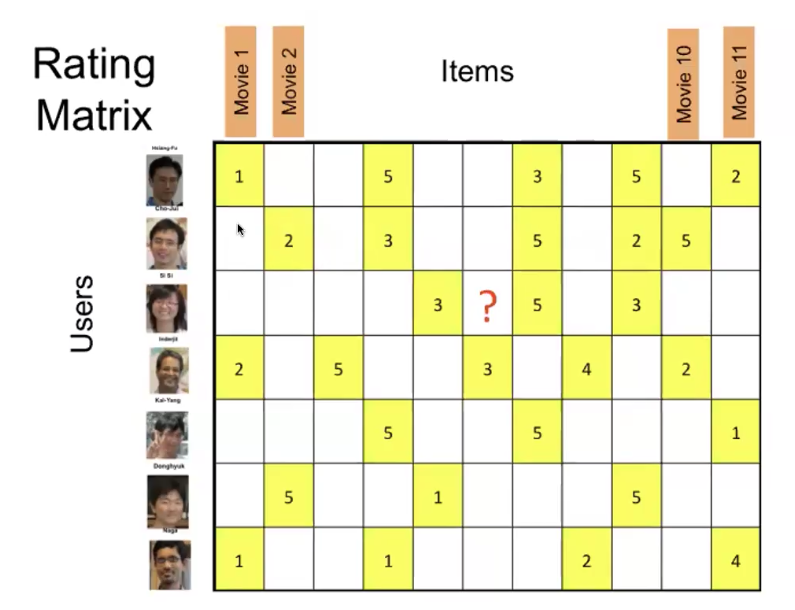

## Matrix factorization Approach

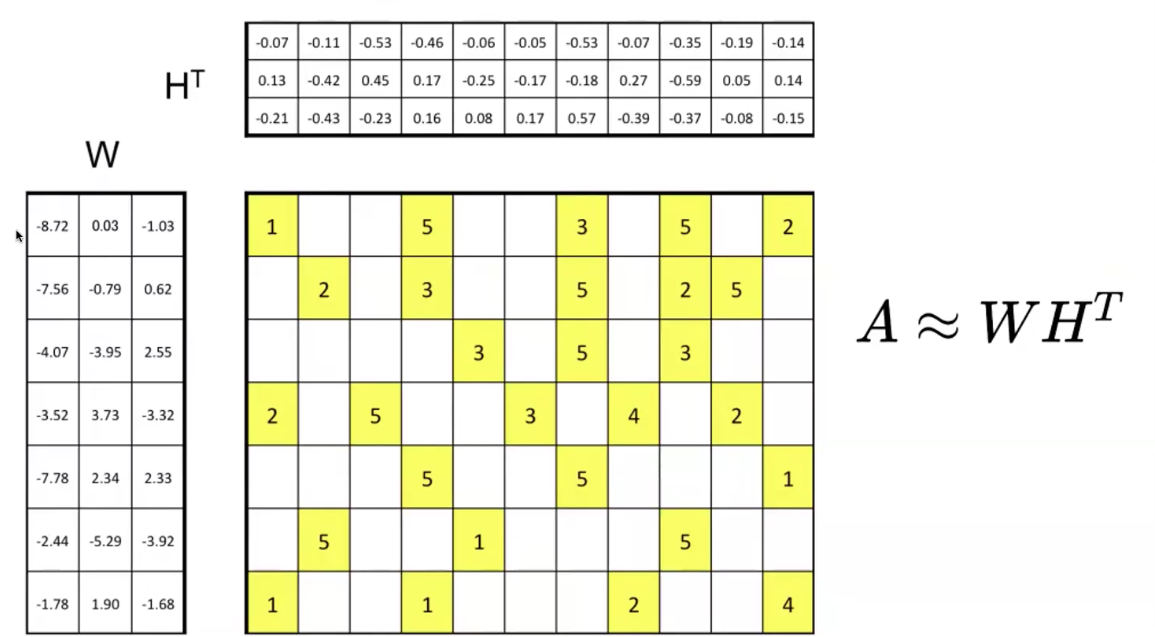


### Explanation of the Formula

1. **Matrix $A$**:
   - $A$ is an $m$-by-$n$ matrix representing the original data matrix. In the context of recommendation systems, $A$ might contain user-item ratings, where the rows represent users and the columns represent items.

2. **Matrix $W$**:
   - $W$ is an $m$-by-$k$ matrix, where $k$ is the number of latent factors. Each row of $W$ represents the latent features of the corresponding user.

3. **Matrix $H$**:
   - $H$ is an $n$-by-$k$ matrix, where each row of $H$ represents the latent features of the corresponding item.

4. **Matrix Multiplication**:
   - $H^T$ is the transpose of $H$, which makes it a $k$-by-$n$ matrix.
   - The product $W H^T$ results in an $m$-by-$n$ matrix that approximates $A$.

### Optimization Problem

The goal of matrix factorization is to find $W$ and $H$ that minimize the difference between $A$ and $W H^T$ for the observed entries. The optimization problem is (A kind-of least squares):

$$
\min_{W \in \mathbb{R}^{m \times k}, H \in \mathbb{R}^{n \times k}} \sum_{(i,j) \in \Omega} (A_{ij} - w_i^T h_j)^2 + \lambda \left( \|W\|_F^2 + \|H\|_F^2 \right)
$$

- **A**: \( m \)-by-\( n \) matrix
- **$\Omega$**: the set of observed entries
- Regularized terms to avoid over-fitting

Matrix factorization maps users and items (both entries of the Matrix) to a **latent feature space**.
- The i-th user >> i-th row of W; $w_i$
- The j-th item >> j-th row of H; $h_j$
- $w_i^Th_j$: measures the interaction between i-th user and j-th item.


### Components of the Optimization Problem

1. **$\sum_{(i,j) \in \Omega} (A_{ij} - w_i^T h_j)^2$**:
   - This term sums the squared differences between the observed entries in $A$ and the corresponding entries in $W H^T$. Here, $\Omega$ represents the set of observed entries in $A$, meaning we only consider the observed ratings in the optimization.

2. **Regularization Term $\lambda \left( \|W\|_F^2 + \|H\|_F^2 \right)$**:
   - $\lambda$ is a regularization parameter that controls the strength of the regularization.
   - $\|W\|_F^2$ and $\|H\|_F^2$ are the Frobenius norms of $W$ and $H$, respectively. The Frobenius norm is the sum of the squares of all the elements in a matrix.
   - This term penalizes large values in $W$ and $H$, helping to prevent overfitting.

### Latent Feature Space
- Each entries of the Matrix $A$ is mapped to a latent feature space:
  - $H$ and $W$

#### Matrix factorization aims to decompose  A  into two matrices  W  and  H :

- W  (Users’ latent features): An  $m \times k$  matrix, where  $m$  is the number of users and  $k$  is the number of latent features.
- H  (Movies’ latent features): An  $n \times k$  matrix, where  $n$  is the number of movies and  $k$  is the number of latent features.

The product  $W H^T$  approximates the original matrix  $A$.

#### Latent Features

The latent features are abstract factors that capture the underlying structure in the data. For Netflix users and movies, latent features might include:

1.	Genre Preference: How much a user likes different genres (e.g., action, comedy, drama).
1.	Actor Preference: How much a user likes movies with specific actors.
1.	Director Preference: How much a user likes movies by certain directors.
1.	Era Preference: Preference for movies from different time periods (e.g., classic, modern).


### Latent Feature Space Example

Consider a simple case with 3 latent features:

- \( k = 3 \) latent features: Genre preference, actor preference, director preference.

#### Users' Latent Features Matrix \( W \)

| User | Genre | Actor | Director |
|------|-------|-------|----------|
| 1    | 0.8   | 0.2   | 0.6      |
| 2    | 0.4   | 0.9   | 0.1      |
| 3    | 0.7   | 0.4   | 0.8      |

#### Movies' Latent Features Matrix \( H \)

| Movie   | Genre | Actor | Director |
|---------|-------|-------|----------|
| Movie A | 0.9   | 0.1   | 0.5      |
| Movie B | 0.3   | 0.8   | 0.2      |
| Movie C | 0.6   | 0.4   | 0.7      |

#### Interpretation

- **User 1**: Likes action movies (high genre score), doesn't care much about specific actors (low actor score), and prefers movies by certain directors (moderate director score).
- **Movie A**: An action movie (high genre score) with an unknown actor (low actor score) and a famous director (moderate director score).

#### Prediction

To predict the rating User 1 would give to Movie A, calculate the dot product of their latent feature vectors:

$$\text{Predicted Rating} = \begin{bmatrix} 0.8 & 0.2 & 0.6 \end{bmatrix} \cdot \begin{bmatrix} 0.9 \\ 0.1 \\ 0.5 \end{bmatrix} = (0.8 \times 0.9) + (0.2 \times 0.1) + (0.6 \times 0.5) = 0.72 + 0.02 + 0.3 = 1.04$$

### Examples of steps needed by Netflix to create the Latent Feature Representation

Netflix can obtain these data points and assign values to all movies using a combination of data collection, matrix factorization, and machine learning techniques. Here’s a step-by#-step explanation of how Netflix could achieve this:

#### Step 1: Data Collection

1. **User Interaction Data**:
   - **Ratings**: Users rate movies on a scale (e.g., 1 to 5 stars).
   - **Viewing History**: Which movies users have watched.
   - **Browsing Behavior**: Movies that users have browsed or searched for.
   - **Engagement Metrics**: Time spent watching, frequency of pauses, rewinds, or skips.

#### Step 2: Constructing the User-Movie Matrix

1. **Matrix $A$**:
   - Create a matrix $A$ where rows represent users and columns represent movies.
   - Each entry $A_{ij}$ contains the rating given by user $i$ to movie $j$. If a user hasn't rated a movie, the entry might be left blank or set to zero.

#### Step 3: Matrix Factorization

1. **Decompose the Matrix**:
   - Use matrix factorization techniques such as Singular Value Decomposition (SVD) or Alternating Least Squares (ALS) to decompose $A$ into two lower-dimensional matrices $W$ and $H$:
     $$A \approx W H^T$$
   - Here, $W$ is the user latent feature matrix, and $H$ is the movie latent feature matrix.

2. **Latent Features**:
   - Each row in $W$ represents a user’s preferences across $k$ latent features.
   - Each row in $H$ represents a movie’s characteristics across $k$ latent features.

#### Step 4: Training the Model

1. **Objective Function**:
   - Define an objective function that includes both the reconstruction error and regularization terms to avoid overfitting:
     $$
     \min_{W, H} \sum_{(i,j) \in \Omega} (A_{ij} - w_i^T h_j)^2 + \lambda (\|W\|_F^2 + \|H\|_F^2)
     $$
   - Here, $\Omega$ represents the set of observed ratings.

2. **Optimization**:
   - Use optimization techniques (e.g., stochastic gradient descent) to minimize the objective function and find the optimal $W$ and $H$.

#### Step 5: Assigning Values to All Movies

1. **Latent Feature Representation**:
   - Each movie now has a vector of latent features (a row in matrix $H$) representing its position in the latent feature space.

2. **Interpreting Latent Features**:
   - While the latent features are abstract, they can often be interpreted in terms of recognizable movie attributes such as genre, director preference, and more.


In [3]:
#### Singular Value Decomposition (SVD) in a complete A scenario

import numpy as np

# Define the matrix A
A = np.array([
    [1, 0, 0, 0, 2],
    [0, 0, 3, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 4, 0, 0, 0]
])

# Perform SVD
U, S, VT = np.linalg.svd(A)

# Convert S to a diagonal matrix
Sigma = np.zeros((A.shape[0], A.shape[1]))
Sigma[:min(A.shape[0], A.shape[1]), :min(A.shape[0], A.shape[1])] = np.diag(S)

# Reconstruct the original matrix (optional)
A_reconstructed = np.dot(U, np.dot(Sigma, VT))

# Print the results
print("Original Matrix A:")
print(A)

print("\nMatrix U:")
print(U)

print("\nSingular Values (Sigma):")
print(Sigma)

print("\nMatrix VT:")
print(VT)

print("\nReconstructed Matrix A (from U, Sigma, VT):")
print(A_reconstructed)

Original Matrix A:
[[1 0 0 0 2]
 [0 0 3 0 0]
 [0 0 0 0 0]
 [0 4 0 0 0]]

Matrix U:
[[ 0.  0.  1.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  0.  1.]
 [-1.  0.  0.  0.]]

Singular Values (Sigma):
[[4.         0.         0.         0.         0.        ]
 [0.         3.         0.         0.         0.        ]
 [0.         0.         2.23606798 0.         0.        ]
 [0.         0.         0.         0.         0.        ]]

Matrix VT:
[[ 0.         -1.          0.          0.          0.        ]
 [-0.          0.          1.         -0.          0.        ]
 [ 0.4472136  -0.         -0.         -0.          0.89442719]
 [ 0.          0.          0.          1.          0.        ]
 [-0.89442719  0.          0.          0.          0.4472136 ]]

Reconstructed Matrix A (from U, Sigma, VT):
[[1. 0. 0. 0. 2.]
 [0. 0. 3. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 4. 0. 0. 0.]]


### Real-life Solving

In real life we do not have all the values to fill out the matrix A - in other words, it is a **partially observed case**.
- We need to use iterative methods.
- The optimization problem is non-convex.
- Explanation: Without making additional assumptions or using specific techniques, there is no guarantee that the optimization process will find the optimal (global) solution.
- Implication: To improve the chances of finding a good solution, we might need to use advanced optimization techniques, incorporate regularization, or make assumptions about the data.
- Example: In practice, methods like stochastic gradient descent, regularization terms, and heuristics are often used to navigate the complex landscape of non-convex problems.

#### Non-convex problem:

Convex Problems
- **Shape**: Bowl-shaped, single global minimum.
- **Objective Function**: Convex, meaning any local minimum is also a global minimum.
- **Optimization**: Easier, well-defined convergence properties.

Non-Convex Problems
- **Shape**: Complex, multiple local minima and maxima.
- **Objective Function**: Non-convex, meaning local minima are not necessarily global minima.
- **Optimization**: Harder, risk of getting stuck in local minima, requires advanced techniques to find good solutions.

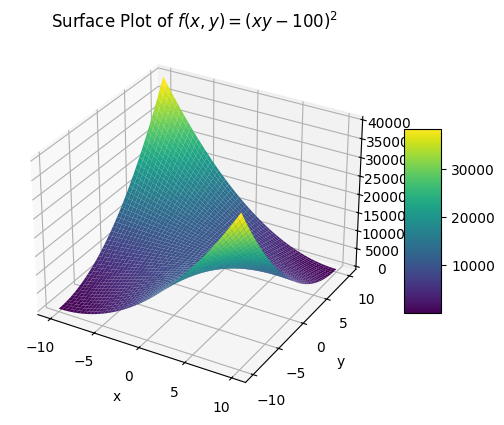

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the function
def f(x, y):
    return (x * y - 100) ** 2

# Generate a grid of x and y values
x = np.linspace(-10, 10, 400)
y = np.linspace(-10, 10, 400)
x, y = np.meshgrid(x, y)
z = f(x, y)

# Create the plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(x, y, z, cmap='viridis')

# Add labels and title
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('Surface Plot of $f(x, y) = (xy - 100)^2$')

# Add a color bar
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

# Show the plot
plt.show()


#### Optimization Strategies

##### ALS: Alternating Least Squares


ALS alternates between fixing one matrix and optimizing the other:

$t =$ iteration number

1. **Iteratively Fix $H$ or $W$ and Optimize the Other**:
    - Fix $W$ and update $H$:
      $H \leftarrow \arg \min_H f(W, H)$
    - Fix $H$ and update $W$:
      $W \leftarrow \arg \min_W f(W, H)$

###### Algorithm

1. **Input**: Partially observed matrix $A$, initial values of $W$ and $H$.
2. **Iterate**:
    - For $t = 1, 2, \ldots$:
      - **Fix $W$ and update $H$**:
        $H \leftarrow \arg \min_H f(W, H)$
      - **Fix $H$ and update $W$**:
        $W \leftarrow \arg \min_W f(W, H)$

###### ALS

- **Alternating Least Squares (ALS)**:
  - ALS is an iterative optimization algorithm used to factorize a matrix into two lower-dimensional matrices.
  - It alternates between fixing one matrix and solving for the other, minimizing the objective function at each step.
  - The objective function includes a reconstruction error term and regularization terms to prevent overfitting.

This method is commonly used in collaborative filtering and recommender systems, where it helps to discover latent factors representing user preferences and item characteristics.

In [5]:
#### ALS in partially-observed case

import numpy as np

# Define the matrix A (example)
A = np.array([
    [5, 3, 0, 1],
    [4, 0, 0, 1],
    [1, 1, 0, 5],
    [1, 0, 0, 4],
    [0, 1, 5, 4]
])

# Parameters
num_users, num_items = A.shape
k = 2  # Number of latent features
lambda_reg = 0.1  # Regularization parameter
num_iterations = 10  # Number of iterations

# Initialize W and H with random values
W = np.random.rand(num_users, k)
H = np.random.rand(num_items, k)

# ALS for Matrix Factorization
for iteration in range(num_iterations):
    # Fix H and solve for W
    for i in range(num_users):
        W[i, :] = np.linalg.solve(
            np.dot(H.T, H) + lambda_reg * np.eye(k),
            np.dot(H.T, A[i, :].T)
        ).T

    # Fix W and solve for H
    for j in range(num_items):
        H[j, :] = np.linalg.solve(
            np.dot(W.T, W) + lambda_reg * np.eye(k),
            np.dot(W.T, A[:, j])
        ).T

# Reconstructed matrix
A_pred = np.dot(W, H.T)
print("Original Matrix:\n", A)
print("Reconstructed Matrix:\n", A_pred)

Original Matrix:
 [[5 3 0 1]
 [4 0 0 1]
 [1 1 0 5]
 [1 0 0 4]
 [0 1 5 4]]
Reconstructed Matrix:
 [[ 5.08579148  1.88801141 -0.71565833  1.54460714]
 [ 3.40075475  1.26859409 -0.45240518  1.07840132]
 [ 1.53456961  1.03699441  1.77898532  3.94291508]
 [ 1.16526491  0.79747668  1.39372931  3.06873966]
 [-0.44303955  0.54231664  3.07957287  5.12401436]]



#### Stochastic Gradient Descent (SGD) for Matrix Factorization

##### SGD for Matrix Factorization

Using SGD for matrix factorization, we do not need to fix one matrix and optimize the other iteratively, as is done in Alternating Least Squares (ALS). Instead, SGD updates both matrices $W$ and $H$ simultaneously. Here’s how it works:

1. **Decompose the Problem**: Break down the objective function into individual components based on observed entries.
   
   $$
   f(W, H) = \frac{1}{2|\Omega|} \sum_{i,j \in \Omega} (A_{ij} - w_i^T h_j)^2
   $$

2. **Compute Gradients**: For each observed entry $(i, j)$, compute the gradients with respect to $w_i$ and $h_j$.

   $$
   \nabla_{w_i} f_{i,j}(W, H) = (w_i^T h_j - A_{ij}) h_j
   $$
   $$
   \nabla_{h_j} f_{i,j}(W, H) = (w_i^T h_j - A_{ij}) w_i
   $$

3. **Update Rules**: Use these gradients to update $w_i$ and $h_j$ iteratively.

   $$
   w_i \leftarrow w_i - \alpha \nabla_{w_i} f_{i,j}(W, H)
   $$
   $$
   h_j \leftarrow h_j - \alpha \nabla_{h_j} f_{i,j}(W, H)
   $$

4. **Iteration**: Randomly pick an observed entry $(i, j)$, and perform the updates for $w_i$ and $h_j$.

##### Some key points of SGD

- **Matrix Factorization**: Decomposes a matrix $A$ into the product of two lower-dimensional matrices $W$ and $H$.
- **SGD for Matrix Factorization**: Updates the entries of both $W$ and $H$ simultaneously by considering one observed entry at a time, thus eliminating the need to fix one matrix while optimizing the other as done in ALS.
- **Advantages of SGD**: Efficient for large datasets, does not require fixing one matrix, and can handle sparse data effectively.
- **Disadvantages of SGD**: It is hard to parallelize this algorithm.

In [4]:
#### SGD in partially-observed case

import numpy as np

# Define the matrix A (example)
A = np.array([
    [5, 3, 0, 1],
    [4, 0, 0, 1],
    [1, 1, 0, 5],
    [1, 0, 0, 4],
    [0, 1, 5, 4]
])

# Parameters
num_users, num_items = A.shape
k = 2  # Number of latent features
alpha = 0.01  # Learning rate
num_iterations = 5000  # Number of iterations
lambda_reg = 0.02  # Regularization parameter

# Initialize W and H with random values
W = np.random.rand(num_users, k)
H = np.random.rand(num_items, k)
Wi = W.copy()
Hi = H.copy()

# SGD for Matrix Factorization
for iteration in range(num_iterations):
    for i in range(num_users):
        for j in range(num_items):
            if A[i, j] > 0:  # Only consider observed entries
                error = A[i, j] - np.dot(W[i, :], H[j, :].T)
                for r in range(k):
                    W[i, r] += alpha * (2 * error * H[j, r] - lambda_reg * W[i, r])
                    H[j, r] += alpha * (2 * error * W[i, r] - lambda_reg * H[j, r])

# Reconstructed matrix
A_pred = np.dot(W, H.T)
print("Original Matrix:\n", A)
print("Reconstructed Matrix:\n", A_pred)

Original Matrix:
 [[5 3 0 1]
 [4 0 0 1]
 [1 1 0 5]
 [1 0 0 4]
 [0 1 5 4]]
Reconstructed Matrix:
 [[4.9768497  2.98299539 2.65079169 1.00143603]
 [3.98152104 2.40287264 2.35150355 0.9997102 ]
 [1.00150567 0.99568092 6.08172916 4.9736296 ]
 [0.99860532 0.91203524 4.9308633  3.98451235]
 [1.1525291  1.00239134 4.98616022 3.99253147]]


## Extreme multi-label classification


**Very good for recommendation systems: Amazon for example.**

### Multi-label Classification

**Multi-label classification** is a type of classification problem where each input data point is associated with multiple labels. Unlike traditional single-label classification where each data point is assigned to one class, in multi-label classification, each data point can be assigned to multiple classes.

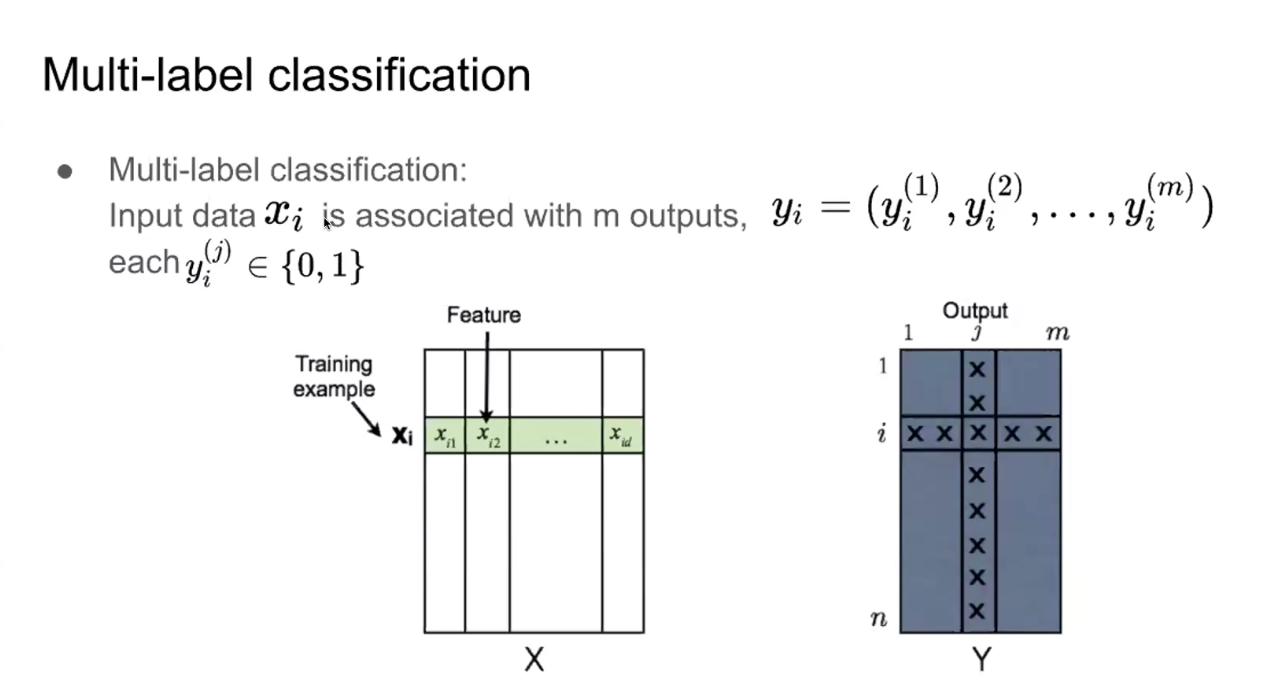

### Explanation of the Slide

1. **Notation and Input Data**:
   - **Input Data $\mathbf{x}_i$**: 
     - $\mathbf{x}_i$ represents the feature vector for the $i$-th training example.
     - The feature vector can be represented as $\mathbf{x}_i = [x_{i1}, x_{i2}, \ldots, x_{id}]$, where $d$ is the number of features.
   - **Output Labels $\mathbf{y}_i$**:
     - $\mathbf{y}_i$ represents the set of labels for the $i$-th training example.
     - $\mathbf{y}_i = (y_i^{(1)}, y_i^{(2)}, \ldots, y_i^{(m)})$, where $m$ is the number of possible labels.
     - Each $y_i^{(j)} \in \{0, 1\}$ indicates whether the $j$-th label is assigned to the $i$-th training example. [$y$ is binary: 0 or 1]

2. **Matrix Representation**:
   - **Feature Matrix $\mathbf{X}$**:
     - The matrix $\mathbf{X}$ represents the feature vectors of all training examples.
     - Each row corresponds to a training example $\mathbf{x}_i$, and each column corresponds to a feature.
   - **Output Matrix $\mathbf{Y}$**:
     - The matrix $\mathbf{Y}$ represents the labels of all training examples.
     - Each row corresponds to a training example $\mathbf{y}_i$, and each column corresponds to a label.

3. **Diagram Explanation**:
   - **Training Example $\mathbf{x}_i$**:
     - Highlighted in the feature matrix $\mathbf{X}$.
     - Shows the feature values for the $i$-th example.
   - **Output Labels $\mathbf{y}_i$**:
     - Highlighted in the output matrix $\mathbf{Y}$.
     - Shows the labels assigned to the $i$-th example.

### Summary

- **Multi-label Classification**: Each input data point $\mathbf{x}_i$ is associated with multiple labels $\mathbf{y}_i$, where each label $y_i^{(j)}$ is binary (0 or 1).
- **Feature Matrix $\mathbf{X}$**: Contains feature vectors for all training examples.
- **Output Matrix $\mathbf{Y}$**: Contains the label vectors for all training examples.
- **Training Example**: Each row in $\mathbf{X}$ corresponds to a training example with its features, and each row in $\mathbf{Y}$ corresponds to the labels associated with that training example.

This type of classification is common in scenarios where a single instance can belong to multiple categories, such as text classification (e.g., tagging an article with multiple topics) or image recognition (e.g., identifying multiple objects in an image).

### Example

When searching for products on Amazon:
- $X_i$: Query in the search engine [0:d are the words] in instance i.
- $Y_i$: Items on Amazon [0:m are the different items] in instance i.

Amazon would get values for Y by getting data on items clicked by search, etc.

In Amazon $m$ is an extremely large number (billions of products)

### Aproaches:

#### Naive Linear Approach

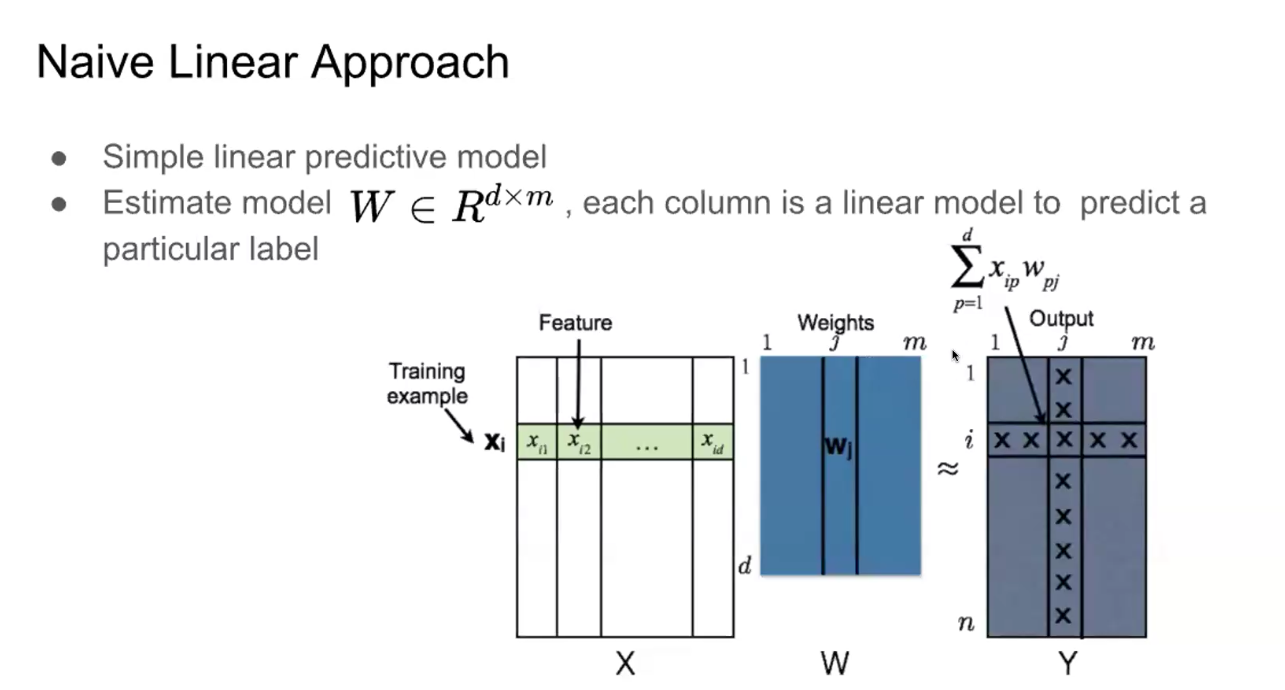

The naive linear approach for multi-label classification uses a simple linear predictive model to estimate the relationship between the input features and the multiple labels.

##### Key Components

1. **Feature Matrix $\mathbf{X}$**:
   - Represents the input data.
   - Each row corresponds to a training example $\mathbf{x}_i$.
   - Each column corresponds to a feature.
   - Dimension: $n \times d$ where $n$ is the number of training examples and $d$ is the number of features.

2. **Weight Matrix $\mathbf{W}$**:
   - Represents the weights or parameters of the linear model.
   - Each column $\mathbf{w}_j$ corresponds to the weights for predicting the $j$-th label.
   - Dimension: $d \times m$ where $m$ is the number of labels.

3. **Output Matrix $\mathbf{Y}$**:
   - Represents the predicted labels.
   - Each row corresponds to a training example.
   - Each column corresponds to a label.
   - Dimension: $n \times m$.

##### Model Representation

- The linear model for predicting the $j$-th label for the $i$-th training example is given by:

  $$
  y_{ij} \approx \sum_{p=1}^{d} x_{ip} w_{pj}
  $$

  where:
  - $x_{ip}$ is the $p$-th feature of the $i$-th training example.
  - $w_{pj}$ is the weight for the $p$-th feature for predicting the $j$-th label.
  - $y_{ij}$ is the predicted value for the $j$-th label for the $i$-th training example.

##### Matrix Form

- The predicted output matrix $\mathbf{Y}$ can be approximated as the product of the feature matrix $\mathbf{X}$ and the weight matrix $\mathbf{W}$:

  $$
  \mathbf{Y} \approx \mathbf{X} \mathbf{W}
  $$

##### Explanation of the Diagram

1. **Training Example $\mathbf{x}_i$**:
   - Highlighted in the feature matrix $\mathbf{X}$.
   - Shows the feature values for the $i$-th example.

2. **Weights $\mathbf{w}_j$**:
   - Highlighted in the weight matrix $\mathbf{W}$.
   - Shows the weights used to predict the $j$-th label.

3. **Output $y_{ij}$**:
   - Highlighted in the output matrix $\mathbf{Y}$.
   - Shows the predicted value for the $j$-th label for the $i$-th training example.



#### Low-rank Approach

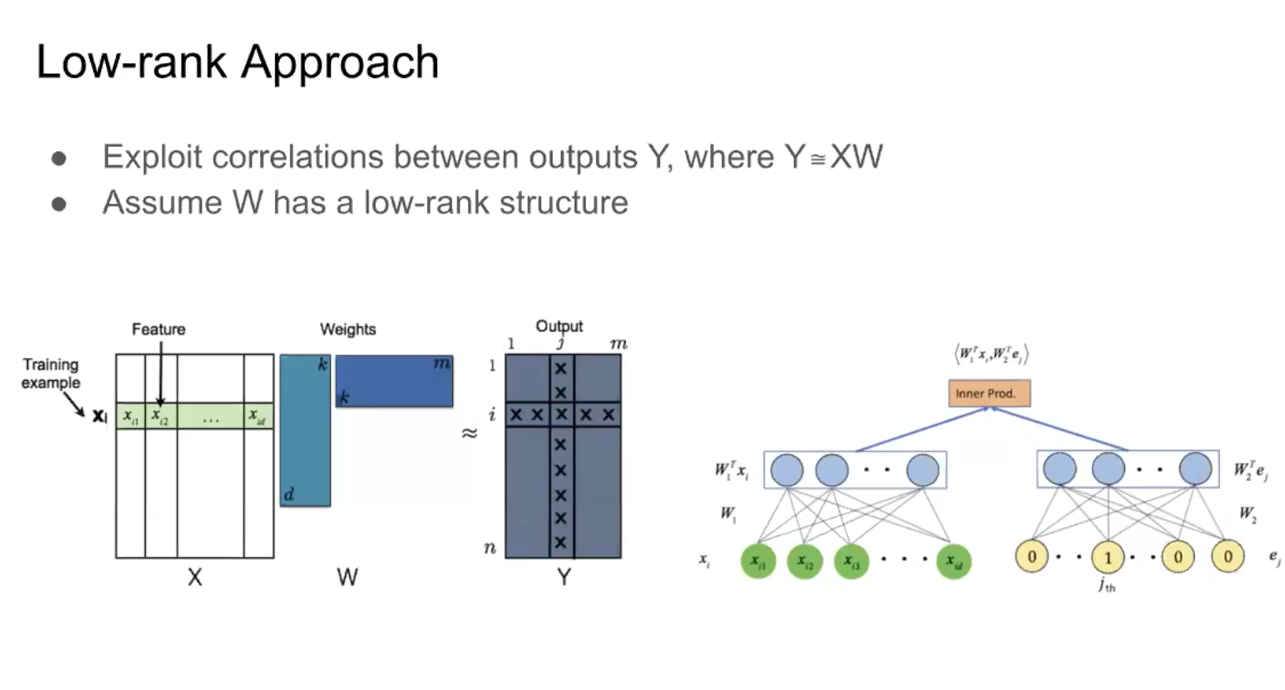

The low-rank approach is a method used in multi-label classification to exploit the correlations between multiple outputs (labels). The key idea is to assume that the weight matrix $\mathbf{W}$ has a low-rank structure, which means that it can be decomposed into the product of two smaller matrices. This approach can help reduce the complexity and improve the efficiency of the model.

##### Key Components

1. **Feature Matrix $\mathbf{X}$**:
   - Represents the input data.
   - Each row corresponds to a training example $\mathbf{x}_i$.
   - Each column corresponds to a feature.
   - Dimension: $n \times d$ where $n$ is the number of training examples and $d$ is the number of features.

2. **Weight Matrix $\mathbf{W}$**:
   - Assumed to have a low-rank structure.
   - Can be decomposed into two smaller matrices: $\mathbf{W} \approx \mathbf{W}_1 \mathbf{W}_2^T$.
   - Dimension: $d \times m$.

3. **Decomposition**:
   - $\mathbf{W}_1$: A matrix of dimension $d \times k$, where $k$ is the rank (a smaller dimension).
   - $\mathbf{W}_2$: A matrix of dimension $m \times k$.

4. **Output Matrix $\mathbf{Y}$**:
   - Represents the predicted labels.
   - Each row corresponds to a training example.
   - Each column corresponds to a label.
   - Dimension: $n \times m$.

##### Model Representation

- The linear model for predicting the labels is given by:

  $$
  \mathbf{Y} \approx \mathbf{X} \mathbf{W} = \mathbf{X} (\mathbf{W}_1 \mathbf{W}_2^T)
  $$

##### Diagram Explanation

1. **Training Example $\mathbf{x}_i$**:
   - Highlighted in the feature matrix $\mathbf{X}$.
   - Shows the feature values for the $i$-th example.

2. **Weights $\mathbf{W}$**:
   - Represented as a product of two smaller matrices $\mathbf{W}_1$ and $\mathbf{W}_2^T$.

3. **Output $\mathbf{Y}$**:
   - The predicted output matrix, approximated by the product $\mathbf{X} \mathbf{W}$.

##### Neural Network Interpretation

The rightmost part of the diagram shows an interpretation using neural networks:

1. **Feature Inputs**:
   - $\mathbf{x}_i$ represents the input features for the $i$-th training example.

2. **Hidden Layer**:
   - The product $\mathbf{W}_1^T \mathbf{x}_i$ represents the activations of the hidden layer, which captures the low-rank structure.

3. **Output Layer**:
   - The inner product between the hidden layer activations and $\mathbf{W}_2$ gives the final output predictions.

##### Advantages

- **Exploits Correlations**: By assuming a low-rank structure, the model can effectively capture the correlations between different labels.
- **Reduced Complexity**: Decomposing $\mathbf{W}$ into smaller matrices $\mathbf{W}_1$ and $\mathbf{W}_2$ reduces the number of parameters, making the model more efficient and less prone to overfitting.

##### Summary

- **Low-Rank Approach**: Assumes the weight matrix $\mathbf{W}$ has a low-rank structure to exploit correlations between outputs.
- **Decomposition**: Decomposes $\mathbf{W}$ into two smaller matrices $\mathbf{W}_1$ and $\mathbf{W}_2^T$.
- **Efficient Representation**: Reduces the complexity of the model by capturing the essential features with fewer parameters.
- **Neural Network Interpretation**: Can be visualized as a neural network with a hidden layer capturing the low-rank structure.


This can be computized using deep neural networks:

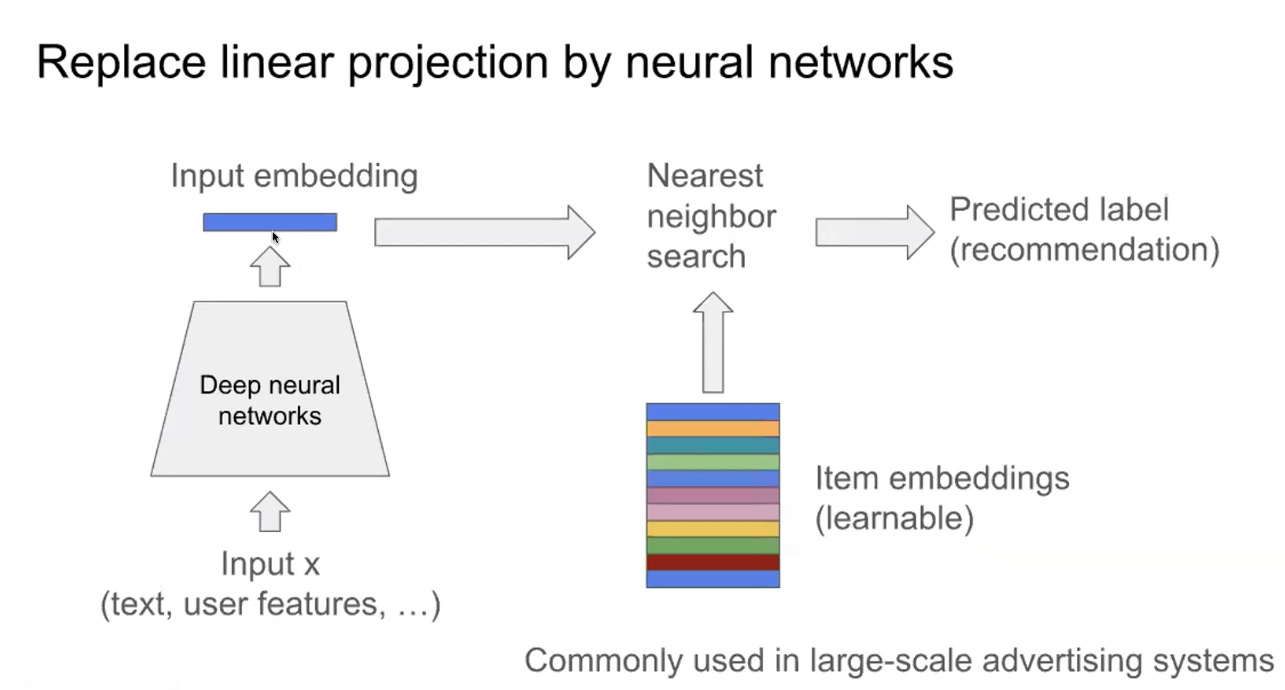

## Two-tower models

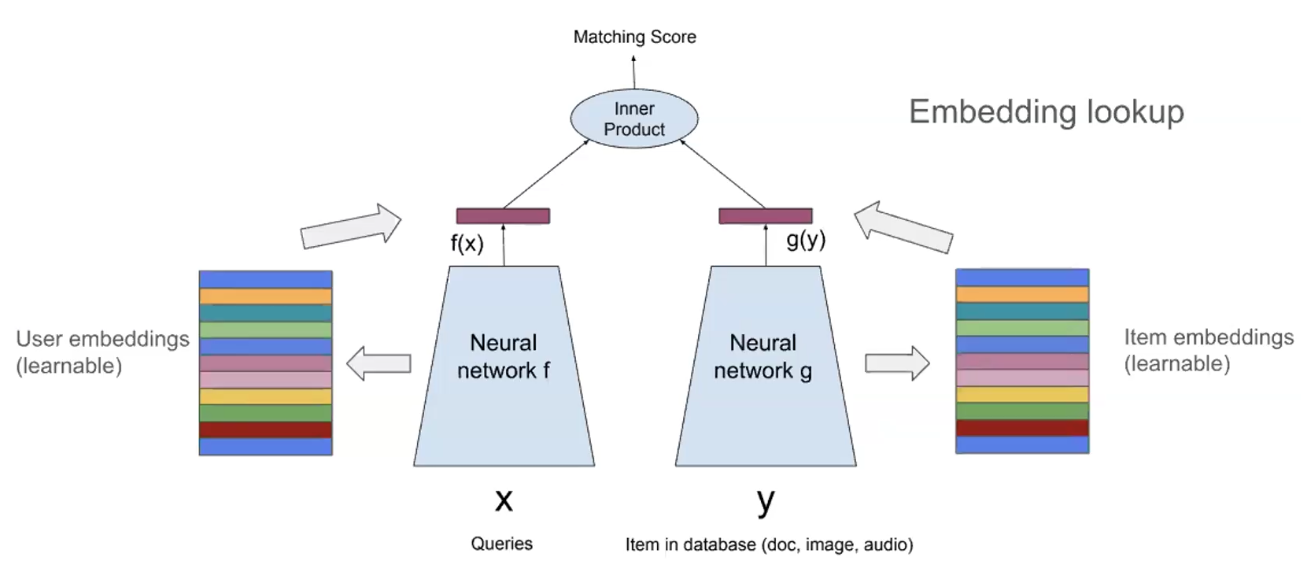

### Deep Two-Tower Model

The deep two-tower model is a type of neural network architecture commonly used in recommendation systems and information retrieval tasks. It is designed to handle two different types of input data streams separately before combining the learned representations to compute a matching score.

#### Key Components

1. **Two Towers**:
   - **Tower f**: Processes one type of input (e.g., queries).
   - **Tower g**: Processes the other type of input (e.g., items in a database).

2. **Neural Network Layers**:
   - Each tower is typically a deep neural network with multiple layers that transform the input features into dense vector embeddings.
   - The layers in each tower can be tailored to the specific type of input data they process.

3. **Output Embeddings**:
   - The output of tower f is an embedding vector $f(x)$ for the query $x$.
   - The output of tower g is an embedding vector $g(y)$ for the item $y$.

4. **Matching Score**:
   - The embeddings from the two towers are combined to compute a matching score.
   - This is often done using the inner product of the two embeddings, which measures the similarity between the query and the item.

#### Workflow

1. **Input**:
   - **Queries (x)**: Inputs to tower f, which could be search queries or user profiles.
   - **Items (y)**: Inputs to tower g, which could be items in a database such as documents, images, or audio files.

2. **Neural Network Processing**:
   - Tower f processes the queries through its neural network layers to produce the query embeddings $f(x)$.
   - Tower g processes the items through its neural network layers to produce the item embeddings $g(y)$.

3. **Combining Embeddings**:
   - The embeddings $f(x)$ and $g(y)$ are combined using an inner product to compute a matching score.
   - This score indicates the relevance or similarity between the query and the item.

4. **Output**:
   - The matching score can be used for ranking items in response to a query, making recommendations, or retrieving relevant information from a database.

#### Summary

- **Deep Two-Tower Model**: A neural network architecture with two separate towers for different types of input data.
- **Neural Networks**:
  - Tower f processes queries to produce query embeddings.
  - Tower g processes items to produce item embeddings.
- **Matching Score**: The embeddings are combined using an inner product to compute a similarity score.
- **Applications**: Used in recommendation systems and information retrieval tasks to match queries with relevant items efficiently.


#### Example in Python (TensorFlow)

Here is a simple implementation of a deep two-tower model using TensorFlow:

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Embedding, Flatten
from tensorflow.keras.models import Model

# Define the input shapes
query_input_shape = (10,)  # Example input shape for queries
item_input_shape = (15,)   # Example input shape for items

# Define the user (query) tower
query_input = Input(shape=query_input_shape, name='query_input')
query_embedding = Dense(64, activation='relu')(query_input)
query_embedding = Dense(32, activation='relu')(query_embedding)
query_model = Model(inputs=query_input, outputs=query_embedding)

# Define the item tower
item_input = Input(shape=item_input_shape, name='item_input')
item_embedding = Dense(64, activation='relu')(item_input)
item_embedding = Dense(32, activation='relu')(item_embedding)
item_model = Model(inputs=item_input, outputs=item_embedding)

# Combine the two towers
query_embeddings = query_model.output
item_embeddings = item_model.output
matching_score = tf.keras.layers.Dot(axes=1)([query_embeddings, item_embeddings])

# Final model
two_tower_model = Model(inputs=[query_model.input, item_model.input], outputs=matching_score)
two_tower_model.compile(optimizer='adam', loss='mean_squared_error')

# Summary of the model
two_tower_model.summary()

# Sample data
import numpy as np
queries = np.random.rand(1000, 10)  # 1000 queries with 10 features each
items = np.random.rand(1000, 15)    # 1000 items with 15 features each
matching_scores = np.random.rand(1000)  # Random matching scores

# Train the model
two_tower_model.fit([queries, items], matching_scores, epochs=5, batch_size=32)

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ query_input         │ (None, 10)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ item_input          │ (None, 15)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 64)        │        704 │ query_input[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 64)        │      1,024 │ item_input[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 32)        │      2,080 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 32)        │      2,080 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dot (Dot)           │ (None, 1)         │          0 │ dense_1[0][0],    │
│                     │                   │            │ dense_3[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 5,888 (23.00 KB)

 Trainable params: 5,888 (23.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step - loss: 0.1000 
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step - loss: 0.0874
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step - loss: 0.0857
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 322us/step - loss: 0.0834
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 314us/step - loss: 0.0771


#### A Unified View of Recommender Systems

Overview of common approaches and considerations in the design of recommender systems. Let's break down each point in detail:

##### Encoder-Based Structure in Recommender Systems

**1. Encoder-Based Structure:**
   - **Latent Space Mapping:**
     - **Queries and Items to Latent Space:** Most recommender systems map both the query (user features, search terms) and items (products, movies, etc.) to a latent space. This is a lower-dimensional space where similar items and queries are close to each other.
     - **Embedding Lookup:**
       - **No Feature Embedding:** Uses pre-trained embeddings or lookup tables to find latent representations for items and queries. This method typically doesn't involve additional features and directly maps items/queries to embeddings.
     - **Linear Mapping and DNNs:**
       - **Matrix Factorization:** A method that decomposes the interaction matrix (e.g., user-item ratings) into product of two lower-rank matrices, effectively mapping users and items into a latent space.
       - **Deep Neural Networks (DNNs):** Use neural network layers to learn complex mappings from raw features of items and queries to their latent representations.
     - **Nearest Neighbor Search:** Once the embeddings are obtained, efficient Approximate Nearest Neighbor Search (ANNS) algorithms are used to find the closest items to a given query in the latent space, facilitating fast and accurate recommendations.

##### Embedding Lookup vs. DNN Encoders

**2. Comparison between Embedding Lookup and DNN Encoders:**
   - **Embedding Lookup:**
     - **Better Memorization:** Embedding lookup is effective at memorizing specific interactions or relationships seen in the training data. It works well for capturing precise, pre-existing patterns without generalizing beyond them.
   - **DNN Encoders:**
     - **Better Generalization:** Deep Neural Networks can learn more complex patterns and generalize better to new, unseen data. They can combine various features and adapt to different types of inputs, potentially offering better performance for diverse recommendation tasks.
   - **Choosing or Combining Both:**
     - The choice between embedding lookup and DNN encoders depends on the specific use case, data characteristics, and the desired balance between memorization and generalization. In some cases, combining both approaches can leverage the strengths of each, using embeddings for known patterns and DNNs for more complex, generalized predictions.

##### Moving Beyond Encoder-Based Structures

**3. Future of Recommender Systems:**
   - **LLM-Based Recommendation:**
     - There is a potential shift towards using Large Language Models (LLMs) for recommendations. LLMs can understand and generate human-like text based on vast amounts of training data. They might be used to understand user queries and item descriptions better, providing more context-aware and nuanced recommendations.
     - The question posed is whether we can move away from traditional encoder-based structures entirely by using more advanced, context-aware models like LLMs for recommendation tasks.

##### Summary

- **Encoder-Based Models:** Most current systems map items and queries to a latent space using embedding lookups or DNNs and then use nearest neighbor search for recommendations.
- **Embedding Lookup vs. DNN Encoders:** Embedding lookups excel at memorization while DNNs provide better generalization, and combining them might offer the best of both worlds.
- **Future Directions:** Exploring the use of LLMs for recommendation systems to potentially move beyond traditional encoder-based architectures, aiming for more sophisticated and context-aware recommendations.

##### **Key Concepts Defined**

**Encoder:**
A neural network component that transforms input data into a lower-dimensional latent representation.
- Example: In a sentence, “The cat sits on the mat,” an encoder might transform this sentence into a fixed-size vector that captures the semantic meaning of the sentence.

**Embedding Lookup:**
A method of mapping discrete items (like words or IDs) directly to dense vector embeddings using a pre-trained embedding matrix.
- Example: Word embeddings like Word2Vec or GloVe map words to vectors. For the word “king,” the embedding lookup might return a vector [0.25, -0.17, 0.58, …].

**Latent Space:**
A lower-dimensional space where data points are represented such that similar points are close to each other, capturing the underlying structure of the data.
- Example: In a movie recommendation system, users and movies are mapped to points in a 10-dimensional latent space where the proximity of points represents user preferences and movie similarities.

**Matrix Factorization:**
A technique that decomposes a large matrix (e.g., user-item interactions) into the product of two smaller matrices, revealing latent factors.
- Example: Given a user-item interaction matrix for movie ratings, matrix factorization decomposes it into two matrices: one representing users and the other representing movies, each with latent features like “action preference” or “comedy preference.”

**DNN (Deep Neural Network):**
A neural network with multiple layers that can learn complex patterns and representations from data.
- Example: A DNN for image classification might transform an input image into a feature vector through multiple layers of convolutions and nonlinear activations, ultimately classifying the image into categories like “cat” or “dog.”

**Approximate Nearest Neighbor Search (ANNS):**
Algorithms used to quickly find the closest points in a latent space, facilitating efficient retrieval of similar items.
- Example: In a photo-sharing app, ANNS helps quickly find similar images to a given query image by comparing their latent representations.

**Memorization:**
The ability of a model to recall specific patterns or interactions seen in the training data.
- Example: A recommendation system that memorizes specific user-item interactions seen in the training data, such as user A always liking action movies.

**Generalization:**
The ability of a model to apply learned patterns to new, unseen data, adapting to various inputs.
- Example: A recommendation system that generalizes well might recommend a new romantic comedy to a user who likes romantic movies and comedies, even if they haven’t seen the specific movie before.

**LLM (Large Language Model):**
A type of model trained on extensive text data capable of understanding and generating human-like text, potentially useful for context-aware recommendations.
- Example: GPT-3 can generate human-like text based on a given prompt. For instance, given the prompt “Once upon a time,” it can continue the story in a coherent and contextually relevant way.

# Low-rankness for Efficient Deep Learning

## Low-rank Model Compression

- Need model compression for:
  - run models on device.
  - reduce the serving cost.

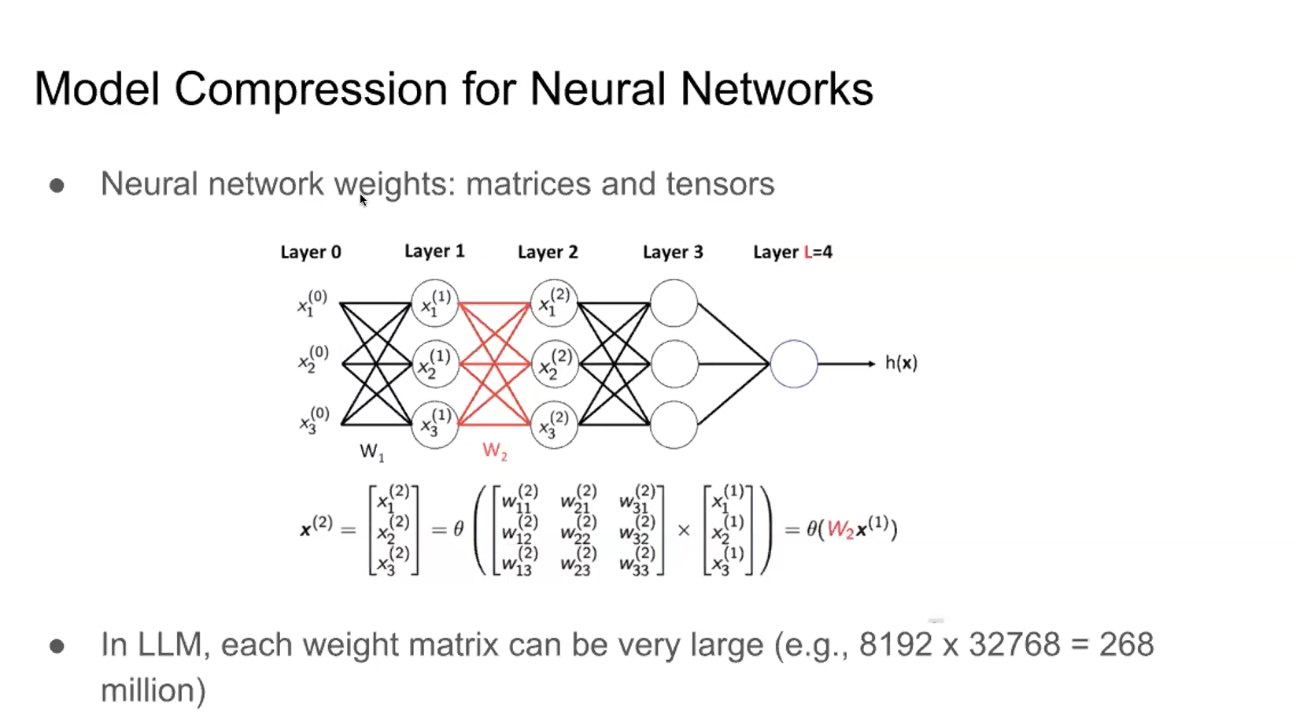

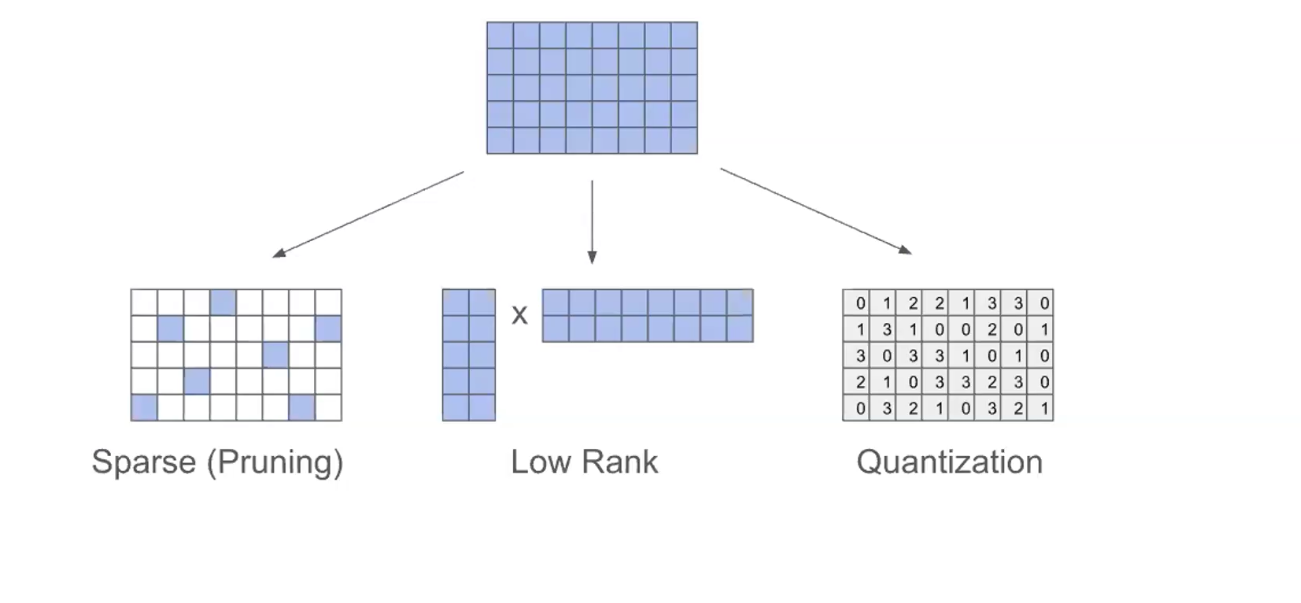

### Model Compression Techniques

**1. Pruning:**
   - Removing unnecessary weights or neurons that contribute little to the output.
   - Reduces the number of parameters and computational load.

**2. Quantization:**
   - Reducing the precision of the weights (e.g., from 32-bit floating point to 8-bit integers).
   - Decreases memory usage and increases inference speed.

**3. Low-Rank Factorization:**
   - Decomposing large weight matrices into products of smaller matrices.
   - Reduces the number of parameters by exploiting the low-rank structure.

**4. Knowledge Distillation:**
   - Training a smaller model (student) to replicate the behavior of a larger model (teacher).
   - The student model learns to approximate the teacher model's predictions.

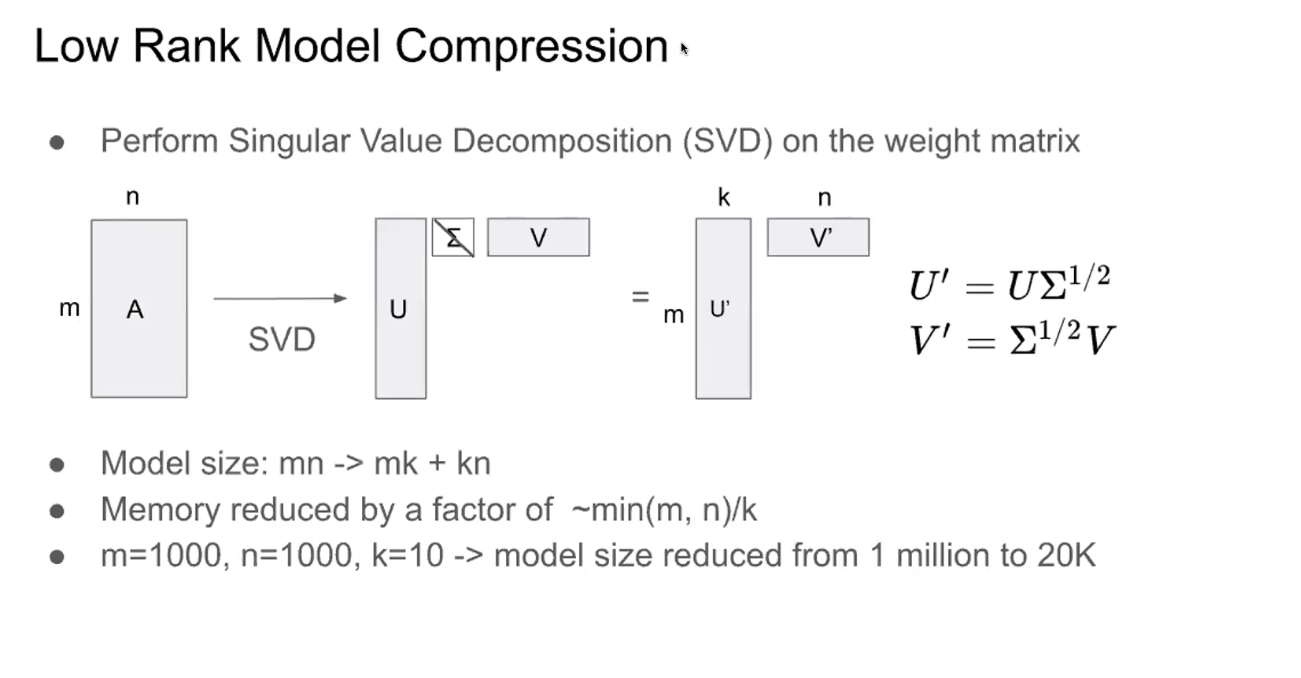

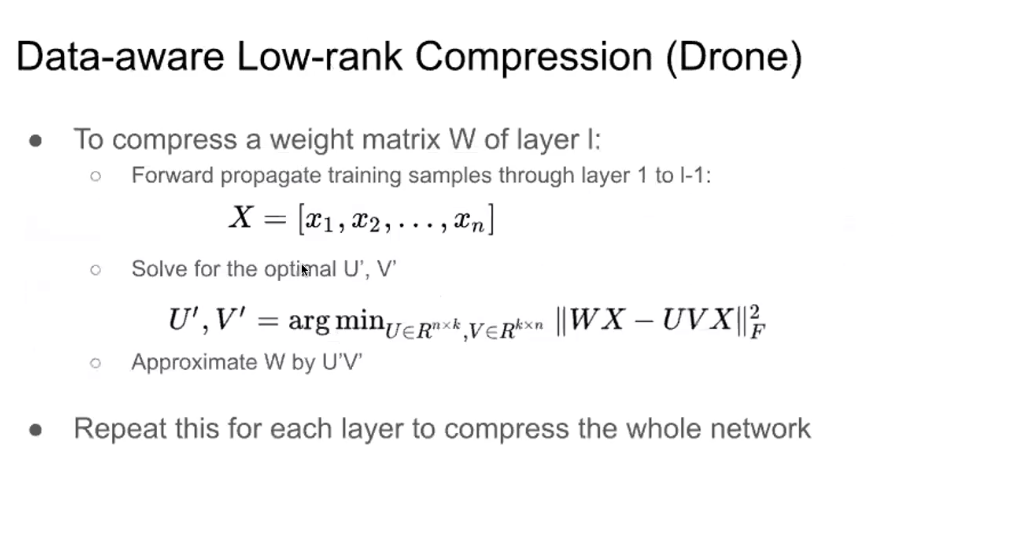

### Example of Low-Rank Factorization

Consider a weight matrix $W$ of size $m \times n$. Instead of using the full matrix, we approximate it by the product of two smaller matrices $A$ and $B$ where:
$W \approx A \cdot B$
- $A \in \mathbb{R}^{m \times k}$
- $B \in \mathbb{R}^{k \times n}$

This reduces the number of parameters from $mn$ to $mk + kn$.

### Summary

- **Model Compression:** Techniques to reduce the size and computational requirements of neural networks.
- **Key Components:** Weight matrices, layers, and activations in neural networks.
- **Techniques:** Pruning, quantization, low-rank factorization, and knowledge distillation.
- **Large Language Models:** Have massive weight matrices requiring effective compression for deployment on resource-limited devices.

By applying these techniques, neural networks can be made more efficient, enabling their deployment in a wider range of applications.

## Low-rank approaches for efficient training

### Parameter-efficient Fine-tuning

- Fine-tuning a large model (e.g., LLM) on some tasks
- (GPU) Memory cost proportional to model size
- Requires large number of GPUs for fine-tuning 

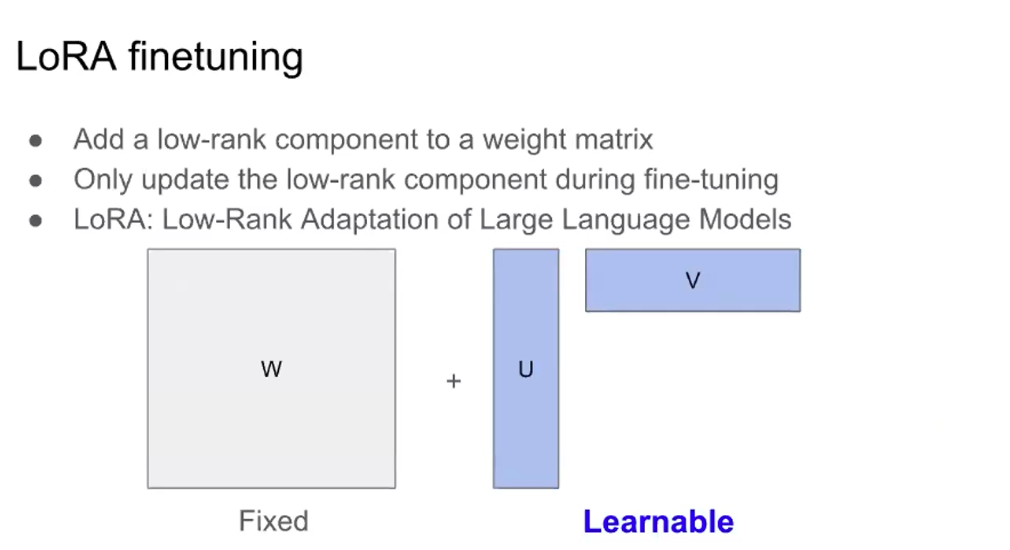

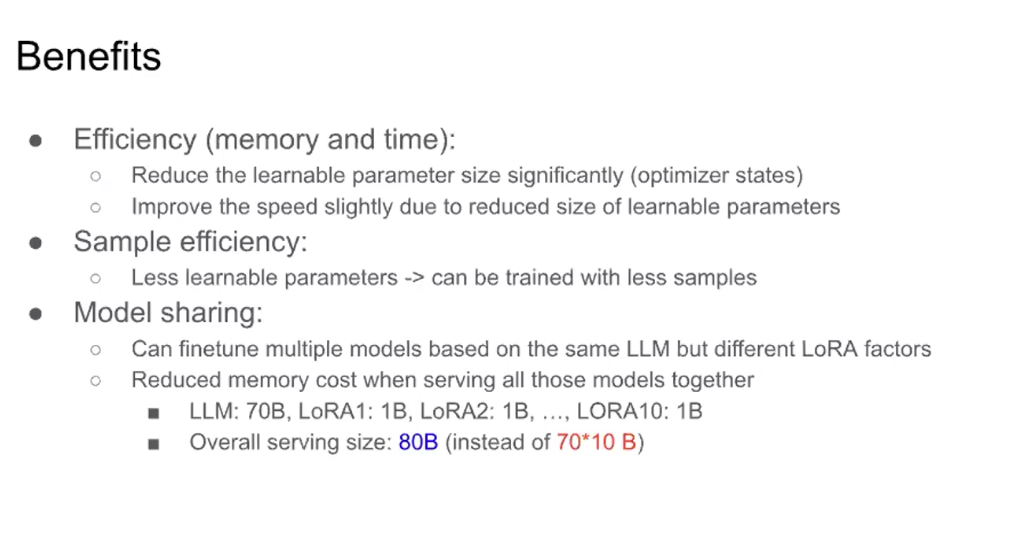

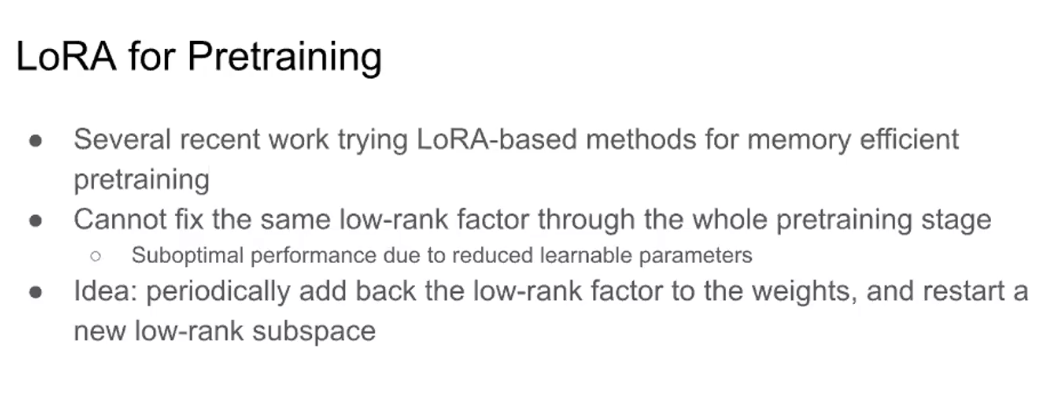

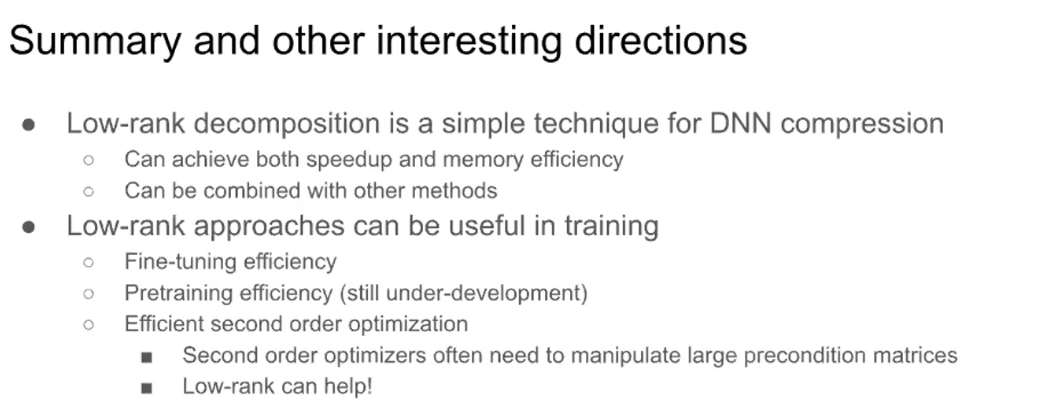